Sample Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

✅ Accuracy: 0.9919282511210762

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


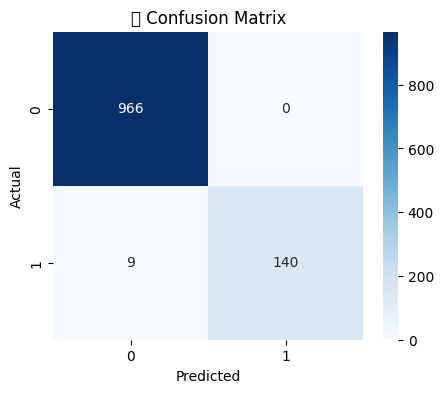

📩 Message: Win a brand new car now!!!
🔍 Prediction: SPAM 🚫
📩 Message: Are you free for a meeting tomorrow?
🔍 Prediction: HAM ✅
📩 Message: Your OTP is 123456. Do not share it.
🔍 Prediction: HAM ✅


In [1]:
# 📌 Step 1: Install necessary packages (for Colab)
!pip install scikit-learn pandas matplotlib seaborn

# 📌 Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Step 3: Load dataset (public spam dataset)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=["label", "message"])

# 📌 Step 4: Explore the dataset
print("Sample Data:")
print(df.head())

# 📌 Step 5: Preprocess data
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1

# Features and labels
X = df['message']
y = df['label_num']

# 📌 Step 6: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 📌 Step 8: Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 📌 Step 9: Evaluate the model
y_pred = model.predict(X_test_vec)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 10: Confusion matrix visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📌 Step 11: Test the model with your own messages
def test_message(msg):
    msg_vec = vectorizer.transform([msg])
    prediction = model.predict(msg_vec)
    print(f"📩 Message: {msg}")
    print("🔍 Prediction:", "SPAM 🚫" if prediction[0] == 1 else "HAM ✅")

# 📌 Example tests
test_message("Win a brand new car now!!!")
test_message("Are you free for a meeting tomorrow?")
test_message("Your OTP is 123456. Do not share it.")